In [3]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


Statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [4]:
data = pd.read_csv("stroke.csv")

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:

categorical_cols = data.select_dtypes(include=['object'])

numerical_cols = data.select_dtypes(exclude=['object']).drop(columns=['id', 'stroke'], errors='ignore')

print("Categorical Data:")
print(categorical_cols.head())

print("\nNumerical Data:")
print(numerical_cols.head())

Categorical Data:
   gender ever_married      work_type Residence_type   smoking_status
0    Male          Yes        Private          Urban  formerly smoked
1  Female          Yes  Self-employed          Rural     never smoked
2    Male          Yes        Private          Rural     never smoked
3  Female          Yes        Private          Urban           smokes
4  Female          Yes  Self-employed          Rural     never smoked

Numerical Data:
    age  hypertension  heart_disease  avg_glucose_level   bmi
0  67.0             0              1             228.69  36.6
1  61.0             0              0             202.21   NaN
2  80.0             0              1             105.92  32.5
3  49.0             0              0             171.23  34.4
4  79.0             1              0             174.12  24.0


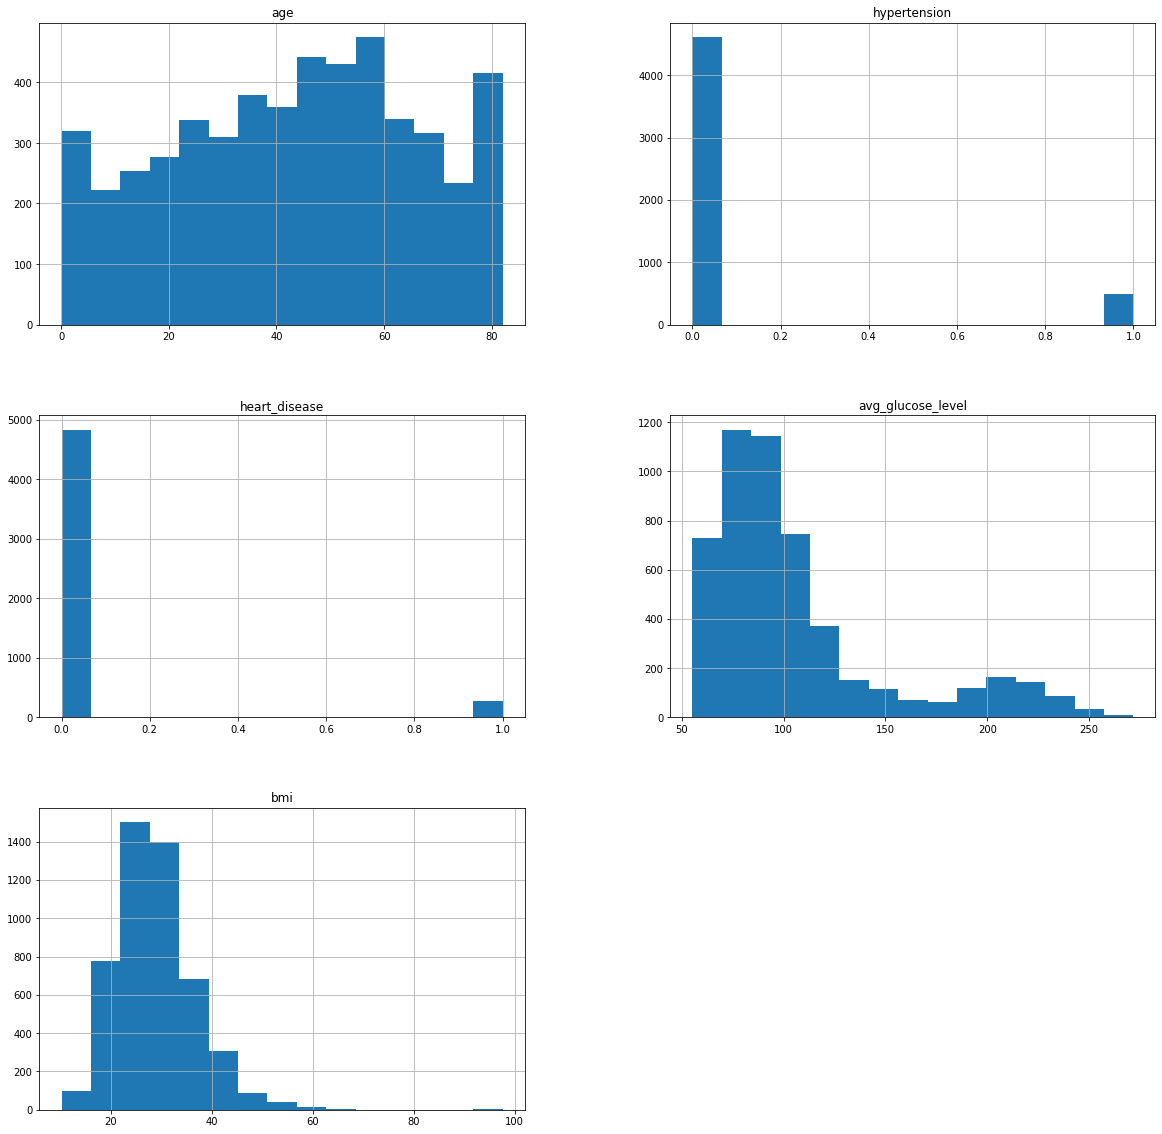

In [11]:
numerical_cols.hist(bins=15, figsize=(20, 20), layout=(3, 2))
plt.show()

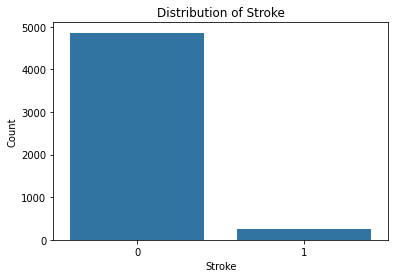

In [12]:
sns.countplot(x='stroke', data=data)
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

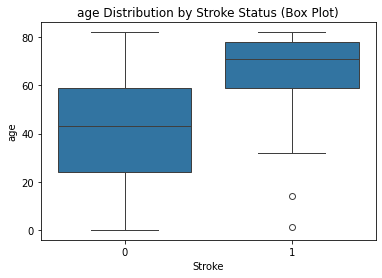

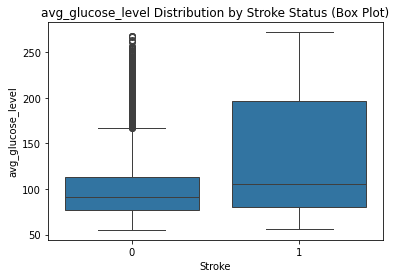

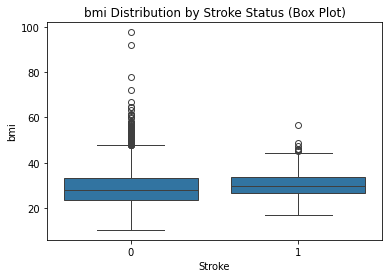

In [13]:
continuous_features = ['age','avg_glucose_level', 'bmi']

for column in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stroke', y=column, data=data)
    plt.title(f'{column} Distribution by Stroke Status (Box Plot)')
    plt.xlabel('Stroke')
    plt.ylabel(column)
    plt.show()

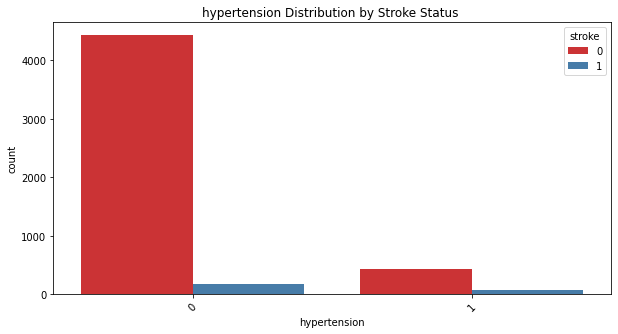

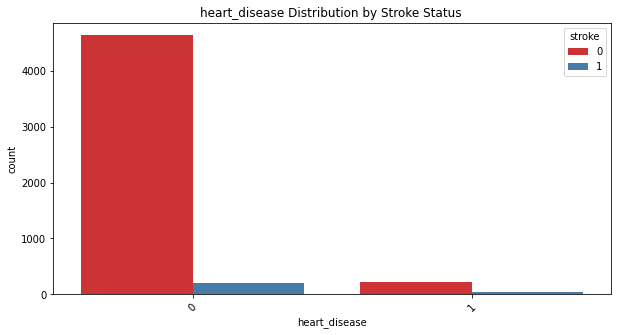

In [14]:
cols = ['hypertension', 'heart_disease']  

for column in cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data, hue='stroke', palette="Set1")    
    plt.title(f'{column} Distribution by Stroke Status ')
    plt.xticks(rotation=45)
    plt.show()

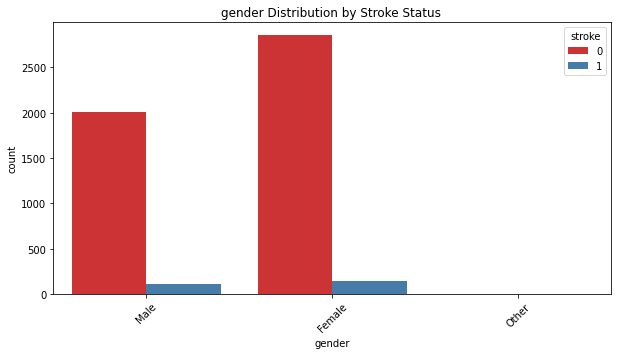

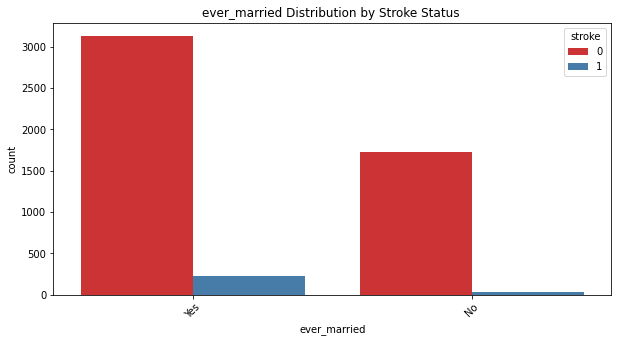

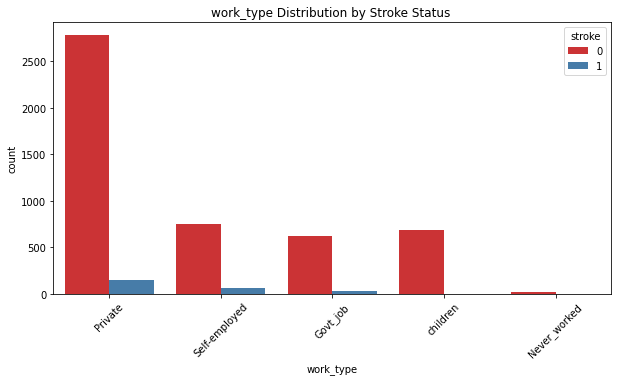

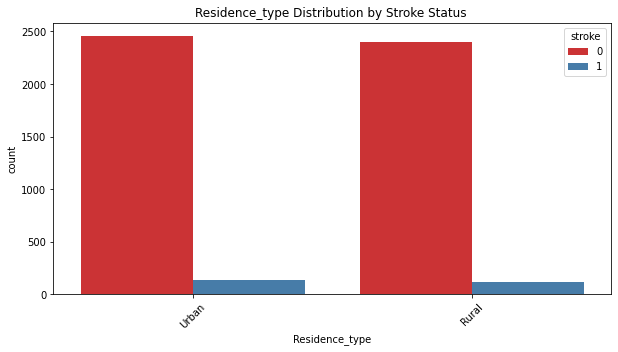

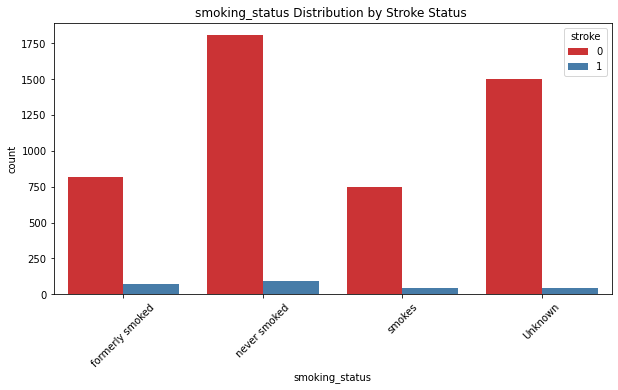

In [15]:
for column in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data, hue='stroke', palette="Set1") 
    plt.title(f'{column} Distribution by Stroke Status ')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 2000x1500 with 0 Axes>

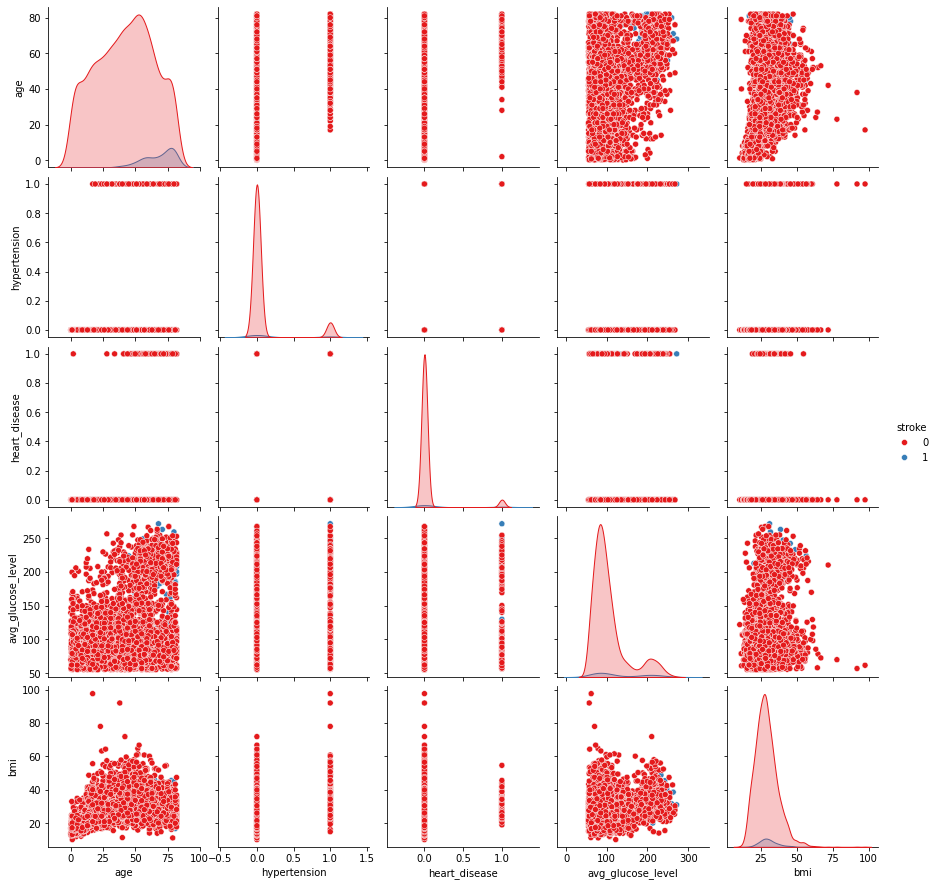

In [16]:
# Drop 'id'
data = data.drop(columns=['id'])

fig = plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data, hue="stroke", palette="Set1")
plt.show()

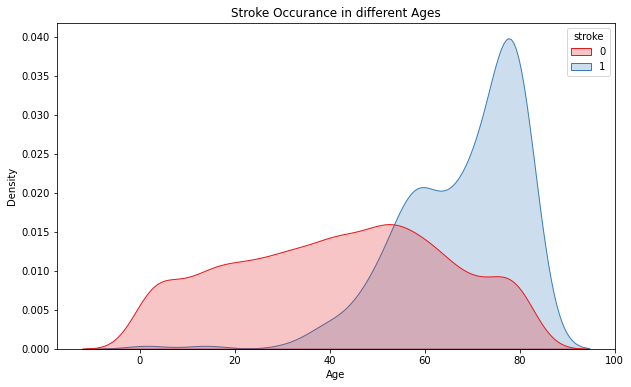

In [17]:
# Density plot of 'age' for each 'stroke' category
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='age', hue='stroke', fill=True, common_norm=False, palette="Set1")
plt.title('Stroke Occurance in different Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<Figure size 720x432 with 0 Axes>

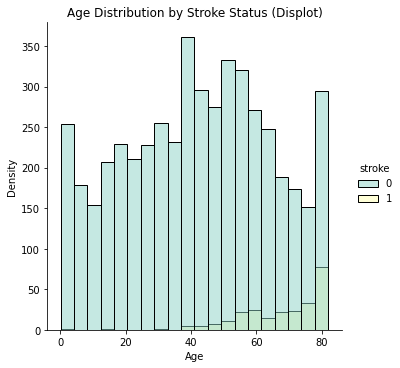

In [18]:
# Displot for age distribution by stroke status
plt.figure(figsize=(10, 6))
sns.displot(data=data, x="age", hue="stroke",bins=20, palette="Set3")
plt.title('Age Distribution by Stroke Status (Displot)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [19]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [22]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(data,categorical_cols)

In [23]:
df_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,NaN,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False


In [24]:
df_encoded = df_encoded.dropna()

Special Treatment : The BMI column has null values so it required the special treatment. I have dropped the column as part of the special treatment.

2.)Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson
Correlation Coefficient (PCC) and generating scatter plots.

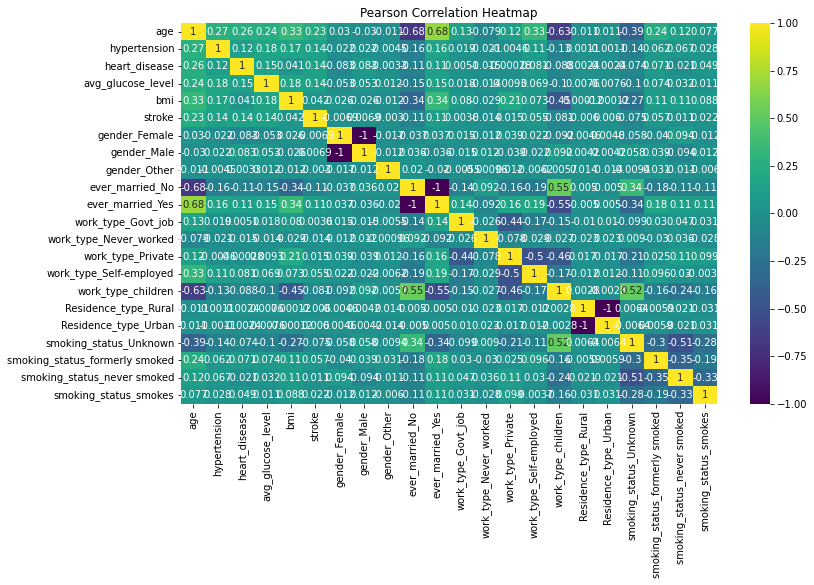

In [25]:
correlation_matrix = df_encoded.corr(method='pearson')
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

Key Correlations: Look for features with strong correlations (close to 1 or -1) with the target variable as they're likely important predictors. Also, note any strong correlations between features, as this might indicate redundancy.

Scatter Plots: Use scatter plots for features with notable correlations to visually inspect their relationships—upward trends for positive correlations and downward trends for negative ones.

Findings: Focus on attributes with strong relationships to the target for predictive modeling. Consider removing or combining features that are highly correlated with each other to avoid multicollinearity.



3. Test , Train , Split

In [ ]:
# Split data into X (features) and y (target)

# Define features (X) and labels (y)
X = df_encoded.drop('stroke', axis=1)  
y = df_encoded['stroke']               

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
2,80.0,0,1,105.92,32.5,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,True,False,False,True,False,...,False,False,False,True,True,False,True,False,False,False
5106,81.0,0,0,125.20,40.0,True,False,False,False,True,...,False,False,True,False,False,True,False,False,True,False
5107,35.0,0,0,82.99,30.6,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.6,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False


4.)Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values).
Report training, validation and testing performance (classification accuracy,
precision, recall and F1 score) and discuss the impact of the hyperparameters
(use markdown cells in Jupyter Notebook to clearly indicate each solution):
A.)Multinomial Logistic Regression (softmax regression); hyperparameters to explore:
C, solver, max number of iterations.

In [ ]:
# Define the model and parameters for lr_grid search

lr = LogisticRegression(multi_class='multinomial', max_iter=10000)
pg = {'C': [0.1, 1, 5, 10, 100], 'solver': ['sag','saga', 'lbfgs','newton-cg']}

# Perform grid search
lr_grid = GridSearchCV(lr, pg, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {lr_grid.best_params_}")
print(f"Best cross-validation score: {lr_grid.best_score_}")

# Evaluation on the validation set
# y_pred = lr_grid.predict(val)
# print(classification_report(y_val, y_pred))

# Evaluation on the test set
y_pred_test = lr_grid.predict(X_test)
print(classification_report(y_test, y_pred_test))


Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best cross-validation score: 0.960529975202995
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982





1.Hyperparameters:

C: Vary regularization strength.
Solver: Try different optimization algorithms.
Max_iter: Adjust for convergence.

2.Tuning:
Use GridSearchCV to systematically explore combinations.

3.Expected Outcomes:
Optimal hyperparameters improve accuracy, precision, recall, and F1 score.

4.Evaluation:
Report performance metrics on training, validation, and testing sets.
Highlight how hyperparameter adjustments impact model performance.

B.Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.  [10 points]

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC

# Define the model and parameters for grid search
model = SVC()
param_grid = {
    'C': [1, 10],
    'kernel': ['linear',  'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

# Evaluation on the validation set
# y_pred = grid.predict(val)
# print(classification_report(y_val, y_pred))

# Evaluation on the test set
y_pred_test = grid.predict(X_test)
print(classification_report(y_test, y_pred_test))


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.9602751981329314
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



C (Regularization Parameter): Balances between a smooth decision boundary and classifying training points accurately. A lower C encourages simplicity (higher bias, lower variance), while a higher C aims for complex boundaries (lower bias, higher variance), which can improve accuracy at the risk of overfitting.

degree: Relevant for the polynomial ('poly') kernel, indicating the polynomial's degree. Higher degrees allow for more complex decision boundaries but increase the risk of overfitting.

gamma: Determines the reach of a single training example's influence. With gamma='auto', it's automatically adjusted based on the input data, affecting the model's flexibility and potential for overfitting.

kernel: The type of kernel function ('sigmoid' in this context), crucial for capturing linear or non-linear relationships. The 'sigmoid' kernel supports non-linear boundaries, useful for binary classification tasks.

C.Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node. [10 points]

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Define the model and parameters for grid search
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

# Feature importance
best_rf = grid.best_estimator_
feature_importances = best_rf.feature_importances_
print("Feature importances:", feature_importances)

# Evaluation on the validation set
# y_pred = grid.predict(val)
# print(classification_report(y_val, y_pred))

# Evaluation on the test set
y_pred_test = grid.predict(X_test)
print(classification_report(y_test, y_pred_test))


Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
Best cross-validation score: 0.9605299752029952
Feature importances: [0.40524543 0.05607482 0.02678594 0.22494027 0.10737136 0.01555763
 0.02744351 0.         0.01806243 0.01077925 0.01962822 0.
 0.01093267 0.0215812  0.00816183 0.00540596 0.00367988 0.01037483
 0.00928224 0.00187061 0.01682191]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



Tuned Hyperparameters:
max_depth: 5, limiting the depth of trees to prevent overfitting.
min_samples_leaf: 2, the minimum number of samples required to be at a leaf node, ensuring that leaf nodes have more than one sample for decision-making, which helps in generalizing the model.
min_samples_split: 5, the minimum number of samples required to split an internal node, controlling the size of trees and again aiding in preventing overfitting.
n_estimators: 10, the number of trees in the forest. A relatively low number, which might affect the model's ability to capture complex patterns but also reduces computational load.
Performance:
Best Cross-Validation Score: 0.961, indicating a strong performance on the cross-validation set.
Classification Performance: Shows high accuracy (95%) but fails to identify any of the minority class instances (class 1), as evidenced by a precision and recall of 0 for this class.
Feature Importance:
The most significant feature contributes approximately 40.5% to the model's decisions, highlighting its importance. Other features vary in their contribution, with several features showing no influence (importance of 0) on the model's predictions.


5.Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings. [8 points]

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Base classifiers
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=10000)
clf2 = SVC(probability=True, kernel='rbf', C=1, gamma='scale')
clf3 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Voting ensemble
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('svc', clf2),
    ('rf', clf3)
], voting='soft')

voting_clf.fit(X_train, y_train)


ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada_clf.fit(X_train, y_train)


# Stacking ensemble
stacking_clf = StackingClassifier(estimators=[
    ('lr', clf1),
    ('svc', clf2),
    ('rf', clf3)
], final_estimator=LogisticRegression())

stacking_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier Performance on Validation Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(f"Precision: {precision_score(y_test, y_pred_voting, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred_voting, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred_voting, average='macro')}")

# Evaluation on the validation set
y_pred_ada = ada_clf.predict(X_test)
print("AdaBoost Classifier Performance on Validation Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f"Precision: {precision_score(y_test, y_pred_ada, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred_ada, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred_ada, average='macro')}")


# Evaluate Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test)
print("\nStacking Classifier Performance on Validation Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stacking)}")
print(f"Precision: {precision_score(y_test, y_pred_stacking, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred_stacking, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred_stacking, average='macro')}")


Voting Classifier Performance on Validation Set:
Accuracy: 0.9460285132382892
Precision: 0.4730142566191446
Recall: 0.5
F1 Score: 0.4861329147043432
AdaBoost Classifier Performance on Validation Set:
Accuracy: 0.9439918533604889
Precision: 0.5984151329243355
Recall: 0.5078193228669496
F1 Score: 0.5031233038022429

Stacking Classifier Performance on Validation Set:
Accuracy: 0.9460285132382892
Precision: 0.4730142566191446
Recall: 0.5
F1 Score: 0.4861329147043432


Voting Classifier
Accuracy: High accuracy at approximately 94.6%, indicating that the ensemble correctly predicts a significant majority of cases.
Precision and Recall: Both precision and recall, along with the F1 score, are moderate. The equal precision and recall for the Voting Classifier suggest a balanced trade-off between the two metrics, but the values themselves are relatively low, indicating room for improvement in correctly identifying positive cases and reducing false positives.


AdaBoost Classifier
Accuracy: Slightly lower than the Voting and Stacking classifiers at about 94.4%, but still very high, suggesting that AdaBoost alone is quite effective.
Precision and Recall: Exhibits the highest precision among the models at approximately 59.8%, indicating a better capability at ensuring the positive predictions are correct. However, the recall and F1 score, although better than the Voting and Stacking classifiers, still suggest there's room for improvement in capturing all true positive cases.

Stacking Classifier
Performance: Mirrors the Voting Classifier exactly in all reported metrics on the validation set, which is an interesting outcome. It suggests that, at least for the specific combination of base learners and meta-learner used in the Stacking Classifier, the performance aligns closely with the Voting Classifier's strategy of averaging out predictions.


Discussion and Findings
Ensemble Performance: The fact that both the Voting and Stacking classifiers show identical performance metrics suggests a potential ceiling in predictive performance with the current base models or feature set used. This ceiling might be due to inherent limitations in the dataset or the features' predictive power regarding the target variable.
Precision-Recall Trade-off: The higher precision of the AdaBoost classifier at the expense of slightly lower accuracy indicates a trade-off. In practical applications, the choice between these models might come down to whether the priority is to minimize false positives (high precision) or to capture as many positive cases as possible (high recall).
Potential for Improvement: While the ensemble methods achieved high accuracy, the relatively lower precision and recall values across the board highlight the challenge in predicting the positive class accurately. This might necessitate further exploration into feature engineering, alternative ensemble strategies, or hyperparameter tuning to enhance model performance.
Application Context: In a medical prediction context, such as stroke prediction, the cost of false negatives (failing to predict a stroke) might be considered higher than the cost of false positives (incorrectly predicting a stroke). In such cases, a model with higher recall might be preferred, even if its overall accuracy is slightly lower.